In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [82]:
df = pd.read_csv('/workspaces/Amazon_Sales_Dataset_Proje/Amazon Sale Report (1).csv', index_col = 'index')
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
index,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [83]:
df.tail()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
index,,,,,,,,,,,,,,,,,,,,
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128976 entries, 0 to 128974
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-null  ob

In [85]:
df.drop(['New','PendingS'], axis = 1, inplace = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128976 entries, 0 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-null  ob

# Eksik Verilere Göz Atalım

df.isnull(), DataFrame’deki (df) eksik (NaN) değerleri kontrol eder ve aynı boyutta bir DataFrame döndürür. Bu yeni DataFrame’de, eksik değerler True, diğer değerler False olarak işaretlenir.
sum(), bu True değerlerini sütun bazında toplar. Yani, her sütundaki eksik değerlerin sayısını verir.

In [87]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [88]:
df.shape[0] # satır sayısını direkt alır

128976

In [89]:
df.shape[1] # sütun sayısını direkt alır

18

In [90]:
df[['currency','Amount']]

,currency,Amount
index,,
0,INR,647.62
1,INR,406.00
2,INR,329.00
3,INR,753.33
4,INR,574.00
...,...,...
128970,INR,517.00
128971,INR,999.00
128972,INR,690.00


In [91]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [92]:
#currency sütunu full INR Değeri içerdiğininden Eksik verileri INR ile doldurabilirim
df['currency'].fillna('INR',inplace = True)

In [93]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [94]:
df['Amount'].describe()

count    121176.000000
mean        648.562176
std         281.185041
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

In [95]:
amountMedian = df['Amount'].median() # amount sütunun ortanca değerini hesapladım
amountMedian

np.float64(605.0)

In [96]:
df['Amount'].fillna(amountMedian, inplace = True)
df['Amount'].isnull().sum()

np.int64(0)

In [97]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [98]:
df[["ship-city","ship-state","ship-country","ship-postal-code"]].dtypes

ship-city            object
ship-state           object
ship-country         object
ship-postal-code    float64
dtype: object

In [99]:
def modAlma(sütun_ismi):
    return df[sütun_ismi].mode()[0]

In [100]:
ship_city_mod = modAlma("ship-city")
ship_state_mod = modAlma("ship-state")
ship_country_mod = modAlma("ship-country")

In [101]:
print(ship_city_mod,ship_state_mod,ship_country_mod)

BENGALURU MAHARASHTRA IN


In [102]:
def str_eksik_veri_doldurma(sütun_ismi,method):
    df[sütun_ismi].fillna(method,inplace = True)

In [103]:
str_eksik_veri_doldurma("ship-city",ship_city_mod)
str_eksik_veri_doldurma('ship-state',ship_state_mod)
str_eksik_veri_doldurma('ship-country',ship_country_mod)

In [104]:
#ship-postal-code bir id olduğu için sayısal bir anlam taşımadığı için burayı string tipine dönüştürecez.
df['ship-postal-code'] = df['ship-postal-code'].astype('str') # bir sütunun tipini değiştirmemizi sağlar
df['ship-postal-code'].dtype

dtype('O')

In [105]:
ship_postal_code_mod = modAlma(sütun_ismi='ship-postal-code')
str_eksik_veri_doldurma(sütun_ismi='ship-postal-code',method =ship_postal_code_mod)

In [106]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
B2B                       0
fulfilled-by          89713
dtype: int64

In [107]:
#fulfilled-by sütununda dolduralamayacak kadar çok eksik veri olduğu için bu sütunu kaldırıyoruz
df.drop('fulfilled-by',axis = 1, inplace = True)

# Veri Tipi Dönüşümü Yapalım

In [108]:
#Veri tiplerini kontrol edelim
df.dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code       object
ship-country           object
B2B                      bool
dtype: object

In [109]:
df['Date'].values

array(['04-30-22', '04-30-22', '04-30-22', ..., '05-31-22', '05-31-22',
       '05-31-22'], dtype=object)

Pythonda zaman bilgisi içeren sütunları string tipinden datatime tipine çevirmemiz gerekiyor. Aksi taktirde zaman içeren bilgiden python string gördüğü için ben ay yıl gün saat dakika saniye gibi bilgileri çikaramam.

In [110]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_9051/2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [111]:
#Tip dönüşümü olmuş mu kontrol edelim
df['Date'].info()

<class 'pandas.core.series.Series'>
Index: 128976 entries, 0 to 128974
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
128976 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 MB


# Sütun İsimlerini Düzgünleştirme

Eğer Çok anlaşılmaz kısaltma sütun ismi konulduysa sütun isimlerini değiştirebilirsin.

Opsiyonel olarak ingilizce sütun ismini türkçeye çevirebilirsin.

In [112]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [116]:
df.rename(columns = {'Qty':'Quantity'},inplace=True)


In [117]:
#Kontrol edelim
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [115]:

# Sütun isimlerini Türkçeye çevirme
# df = df.rename(columns={
#     'Order ID': 'Sipariş ID',
#     'Date': 'Tarih',
#     'Status': 'Sipariş Durumu',
#     'Fulfilment': 'Sipariş Tamamlama Durumu',
#     'Sales Channel': 'Satış Kanalı',
#     'ship-service-level': 'Kargo Hizmet Seviyesi',
#     'Category': 'Kategori',
#     'Size': 'Boyut',
#     'Courier Status': 'Kargo Durumu',
#     'Qty': 'Miktar',
#     'currency': 'Para Birimi',
#     'Amount': 'Tutar',
#     'ship-city': 'Kargo Şehri',
#     'ship-state': 'Kargo Eyaleti/İl',
#     'ship-postal-code': 'Kargo Posta Kodu',
#     'ship-country': 'Kargo Ülkesi',
#     'B2B': 'B2B'
# })

# # Dönüştürülmüş DataFrame'i görüntüleme
# print(df.columns)

# EDA --> Explority Data Analysis --> Keşfedici Veri Analizi

In [119]:
# Önce Sütunlara Göz Atalım
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

11

In [ ]:
# Size Sütunundaki kıyafet bedenleri hakkında genel bilgiler elde ettik
print(df['Size'].nunique())
print()
print(df['Size'].dtype)
print()
print(df['Size'].unique)

11

object

<bound method Series.unique of index
0           S
1         3XL
2          XL
3           L
4         3XL
         ... 
128970     XL
128971      M
128972    XXL
128973     XS
128974      S
Name: Size, Length: 128976, dtype: object>


Hangi Bedenden kaç tane sattığına göz atalım

Text(0.5, 0, 'Bedenler')

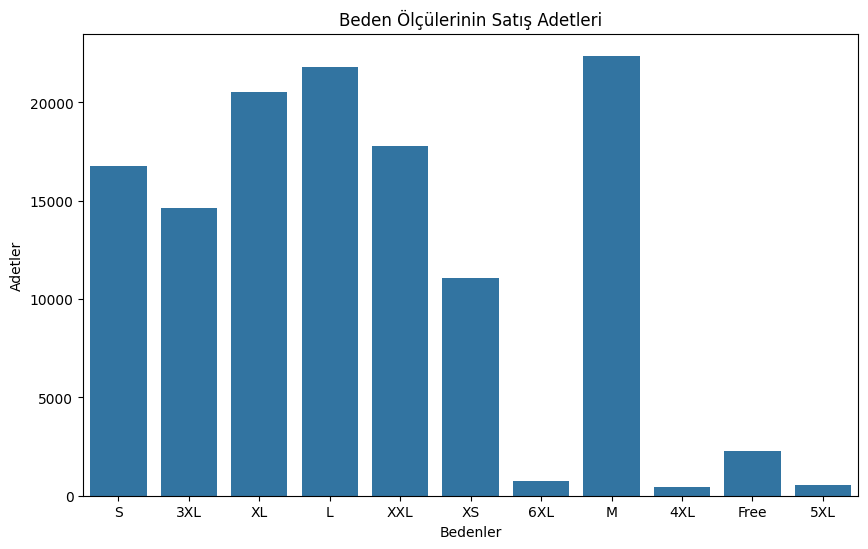

In [124]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Size', data = df)
plt.title('Beden Ölçülerinin Satış Adetleri')
plt.ylabel('Adetler')
plt.xlabel('Bedenler')

İnsanlar 3XL'dan sonra kıyafet siparişi etmiyorlar.

# Grup Bazlı Analizler


pandas'da en çok kullanılan analiz yöntemlerinden biridir.

as_index = False --> Gruplama Yaparken indexleri yeniden oluşturur

sort_values(by = Quantity, ascending =False) Quantity sütununa göre büyükten küçüğe sıralama yapar.

In [ ]:
df.groupby('Size')['Quantity'].sum()

Size
3XL     13360
4XL       398
5XL       513
6XL       688
Free     2070
L       19706
M       20138
S       15041
XL      18636
XS       9850
XXL     16246
Name: Quantity, dtype: int64

In [137]:
df.groupby('Size',as_index = False)['Quantity'].sum()


,Size,Quantity
0,3XL,13360
1,4XL,398
2,5XL,513
3,6XL,688
4,Free,2070
5,L,19706
6,M,20138
7,S,15041
8,XL,18636
9,XS,9850


In [144]:
beden_satıs_adetleri = df.groupby('Size', as_index=False)['Quantity'].sum().sort_values(by = 'Quantity', ascending=False)
beden_satıs_adetleri
beden_satıs_adetleri.to_csv('output/output_csv/beden_satıs_adetleri.csv')

Text(0.5, 0, 'Bedenler')

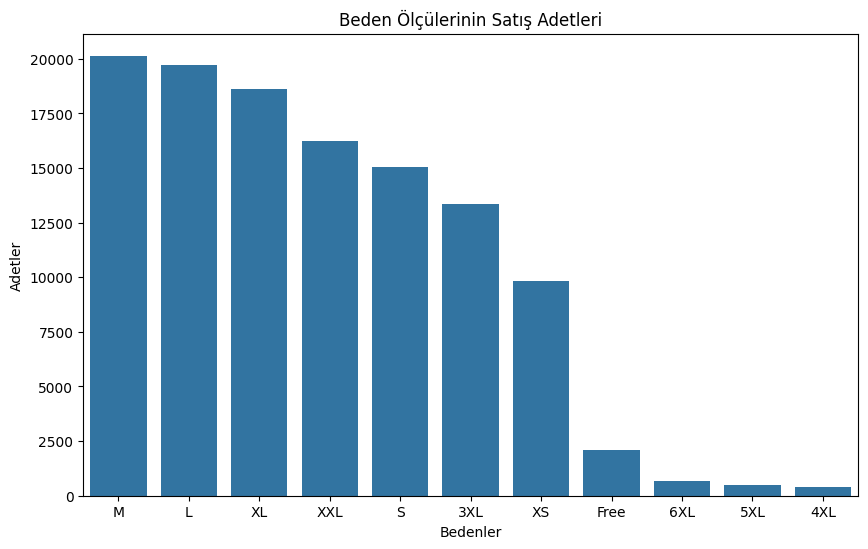

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Size', y ='Quantity', data = beden_satıs_adetleri,)
plt.title('Beden Ölçülerinin Satış Adetleri')
plt.ylabel('Adetler')
plt.xlabel('Bedenler')